<h1>DBSCAN Clustering</h1>

Não supervisionado

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering baseado em densidade. Ao contrário do K-means, ele não exige definir o número de clusters (k) e pode identificar formas arbitrárias de agrupamentos, além de detectar outliers (ruído).

<h3>🎯 O que é e qual o objetivo?</h3>
O objetivo do DBSCAN é encontrar áreas densas de pontos e separá-las de regiões esparsas (consideradas ruído). Ele agrupa pontos que estão a uma distância menor que um certo valor (eps) e que tenham um número mínimo de vizinhos (min_samples).

<h4>🧠 Conceitos-chave</h4>
<ul>
    <li>Ponto central (core point): tem ao menos min_samples vizinhos dentro de eps.</li>
    <li>Ponto de borda: está dentro de eps de um ponto central, mas não é core.</li>
    <li>Ruído: ponto que não é core nem está próximo de um core.</li>
</ul>

<h3>✅ Pré-requisitos</h3>
<ul>
    <li>Dados numéricos com uma noção de distância (geralmente Euclidiana).</li>
    <li>Definir dois parâmetros:
        <ul>
            <li>eps: raio de vizinhança.</li>
            <li>min_samples: número mínimo de pontos para formar um cluster.</li>
        </ul>
    </li>
</ul>

<h3>✅ Vantagens</h3>
<ul>
    <li>Não precisa definir o número de clusters.</li>
    <li>Identifica clusters de forma arbitrária.</li>
    <li>Detecta outliers automaticamente.</li>
    <li>Robusto a ruído e clusters com tamanhos diferentes.</li>
</ul>

<h3>❌ Desvantagens</h3>
<ul>
    <li>Escolha sensível de eps e min_samples.</li>
    <li>Não funciona bem em dados com densidades variáveis.</li>
    <li>Mais lento em grandes volumes de dados com alta dimensionalidade.</li>
</ul>

<h3>💼 Aplicações comuns</h3>
<ul>
    <li>🌐 Geoespacial
        <ul>
            <li>Agrupamento de locais geográficos (ex: zonas de crime, pontos de venda).</li>
        </ul>
    </li>   
    <li>📊 Análise de dados
        <ul>
            <li>Detecção de anomalias e outliers em dados financeiros ou de rede.</li>
            <li>Agrupamento de comportamento de clientes em ambientes complexos.</li>
        </ul>
    </li>   
    <li>🧠 Visão computacional
        <ul>
            <li>Agrupamento de pixels em imagens sem necessidade de formas regulares.</li>
        </ul>
    </li>   
</ul>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

<h2>1️⃣ Carregar o dataset Iris</h2>

In [ ]:
iris = load_iris()
X = iris.data  # features
y = iris.target  # labels reais (0,1,2)

<h2>2️⃣ Normalizar os dados (DBSCAN é sensível a escala!)</h2>

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>3️⃣ Instanciar e aplicar DBSCAN</h2>

In [5]:
dbscan = DBSCAN(eps=0.8, min_samples=19)
dbscan.fit(X_scaled)

DBSCAN(eps=0.8, min_samples=19)

<h2>4️⃣ Resultados</h2>

In [7]:
labels = dbscan.labels_  # Labels dos clusters (-1 = ruído)

<h2>5️⃣ Visualização (usando as 2 primeiras features para facilitar o gráfico)</h2>

In [ ]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=50)

<h2>6️⃣ Labels nos eixos</h2>

In [ ]:
plt.xlabel('Feature 1 (Padronizada)')
plt.ylabel('Feature 2 (Padronizada)')
plt.title('DBSCAN Clustering no Dataset Iris')

<h2>7️⃣ Legenda para o ruído</h2>

C:\Users\julio\AppData\Local\Temp\ipykernel_26600\1311169641.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=label_name)


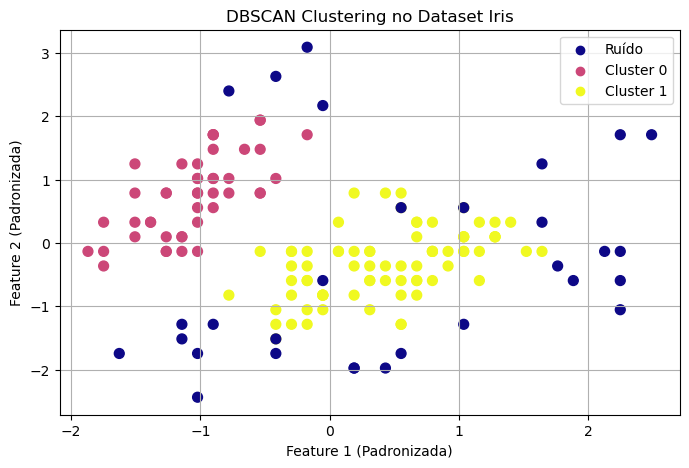

In [ ]:
legend_labels = np.unique(labels)
for i in legend_labels:
    if i == -1:
        label_name = 'Ruído'
    else:
        label_name = f'Cluster {i}'
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=label_name)

plt.legend()
plt.grid(True)
plt.show()

<h2>8️⃣ Mostrar contagem de cada cluster</h2>

C:\Users\julio\AppData\Local\Temp\ipykernel_26600\2514039588.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=label_name)


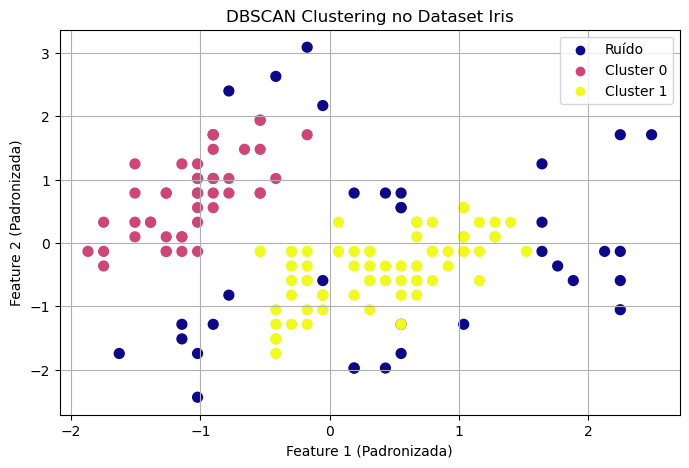

Contagem de pontos por cluster:
 1    71
 0    45
-1    34
Name: count, dtype: int64


In [ ]:
print("Contagem de pontos por cluster:")
print(pd.Series(labels).value_counts())